<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.286767,98.612923,78.106662,-0.000469,218.005884,218.006873,-0.000989
1,0.0,1.0,78.616846,51.967995,32.971571,-0.002262,173.554150,173.556004,-0.001854
2,0.0,2.0,36.232771,73.766316,90.327110,0.000708,210.326905,210.326920,-0.000016
3,0.0,3.0,73.957366,49.206711,67.651998,0.000550,200.816624,200.816144,0.000480
4,0.0,4.0,59.161583,23.331653,35.035204,-0.006833,127.521607,127.528474,-0.006868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,64.521240,54.749573,86.957506,-0.000314,216.228004,216.228412,-0.000407
59996,999.0,56.0,69.802068,68.739229,49.025971,-0.000786,197.566482,197.567627,-0.001145
59997,999.0,57.0,22.054609,77.400560,78.218683,-0.002339,187.671513,187.672917,-0.001404
59998,999.0,58.0,71.155330,23.836045,78.825443,-0.002721,183.814096,183.817385,-0.003289


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.286767  98.612923  78.106662  ...  218.005884  218.006873 -0.000989
      1.0    78.616846  51.967995  32.971571  ...  173.554150  173.556004 -0.001854
      2.0    36.232771  73.766316  90.327110  ...  210.326905  210.326920 -0.000016
      3.0    73.957366  49.206711  67.651998  ...  200.816624  200.816144  0.000480
      4.0    59.161583  23.331653  35.035204  ...  127.521607  127.528474 -0.006868
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   64.521240  54.749573  86.957506  ...  216.228004  216.228412 -0.000407
      56.0   69.802068  68.739229  49.025971  ...  197.566482  197.567627 -0.001145
      57.0   22.054609  77.400560  78.218683  ...  187.671513  187.672917 -0.001404
      58.0   71.155330  23.836045  78.825443  ...  183.814096  183.817385 -0.003289
      59.0   87.311293  93.173331  83.272423  ...  273.756236  273.757302 -0.001066

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.286767  98.612923  78.106662  ...  218.005884  218.006873 -0.000989
      1.0    78.616846  51.967995  32.971571  ...  173.554150  173.556004 -0.001854
      2.0    36.232771  73.766316  90.327110  ...  210.326905  210.326920 -0.000016
      3.0    73.957366  49.206711  67.651998  ...  200.816624  200.816144  0.000480
      4.0    59.161583  23.331653  35.035204  ...  127.521607  127.528474 -0.006868
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   64.521240  54.749573  86.957506  ...  216.228004  216.228412 -0.000407
      56.0   69.802068  68.739229  49.025971  ...  197.566482  197.567627 -0.001145
      57.0   22.054609  77.400560  78.218683  ...  187.671513  187.672917 -0.001404
      58.0   71.155330  23.836045  78.825443  ...  183.814096  183.817385 -0.003289
      59.0   87.311293  93.173331  83.272423  ...  273.756236  273.757302 -0.001066

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.286767,98.612923,78.106662,-0.000469,218.005884,218.006873,-0.000989
1,0.0,1.0,78.616846,51.967995,32.971571,-0.002262,173.554150,173.556004,-0.001854
2,0.0,2.0,36.232771,73.766316,90.327110,0.000708,210.326905,210.326920,-0.000016
3,0.0,3.0,73.957366,49.206711,67.651998,0.000550,200.816624,200.816144,0.000480
4,0.0,4.0,59.161583,23.331653,35.035204,-0.006833,127.521607,127.528474,-0.006868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,64.521240,54.749573,86.957506,-0.000314,216.228004,216.228412,-0.000407
59996,999.0,56.0,69.802068,68.739229,49.025971,-0.000786,197.566482,197.567627,-0.001145
59997,999.0,57.0,22.054609,77.400560,78.218683,-0.002339,187.671513,187.672917,-0.001404
59998,999.0,58.0,71.155330,23.836045,78.825443,-0.002721,183.814096,183.817385,-0.003289


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.286767  98.612923  78.106662  ...  218.005884  218.006873 -0.000989
      1.0    78.616846  51.967995  32.971571  ...  173.554150  173.556004 -0.001854
      2.0    36.232771  73.766316  90.327110  ...  210.326905  210.326920 -0.000016
      3.0    73.957366  49.206711  67.651998  ...  200.816624  200.816144  0.000480
      4.0    59.161583  23.331653  35.035204  ...  127.521607  127.528474 -0.006868
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   64.521240  54.749573  86.957506  ...  216.228004  216.228412 -0.000407
      56.0   69.802068  68.739229  49.025971  ...  197.566482  197.567627 -0.001145
      57.0   22.054609  77.400560  78.218683  ...  187.671513  187.672917 -0.001404
      58.0   71.155330  23.836045  78.825443  ...  183.814096  183.817385 -0.003289
      59.0   87.311293  93.173331  83.272423  ...  273.756236  273.757302 -0.001066

[60000 rows x 7 columns]

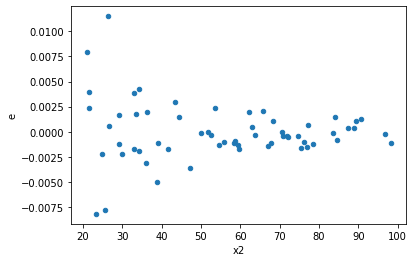

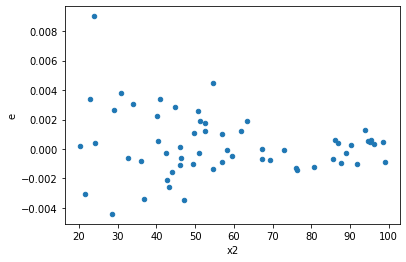

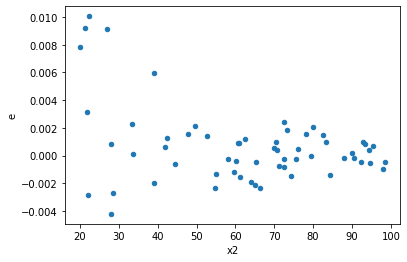

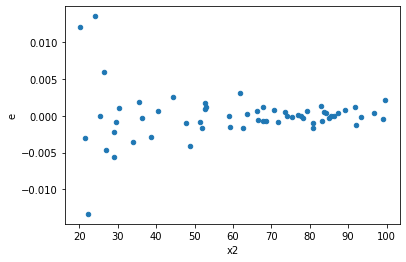

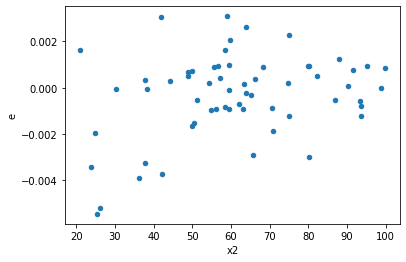

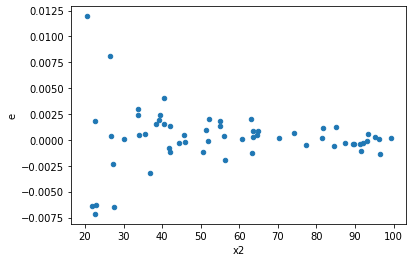

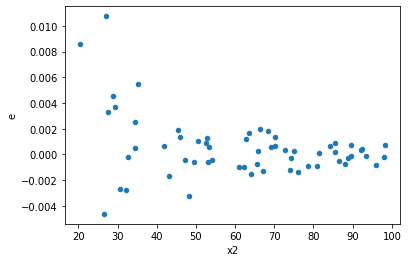

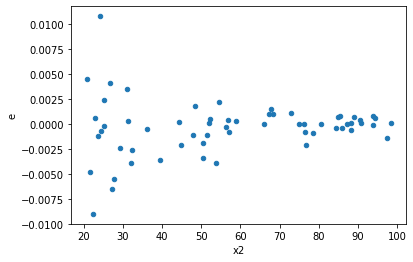

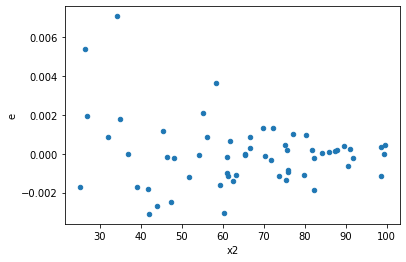

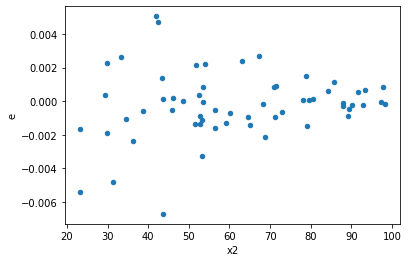

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,33.0,21.0,3.0054924361277104e-05,0.00016457857088050096,9.392163862899095e-07,8.228928544025049e-06,8.605028095153456,7.686466085843335e-08,0.9999999615676696,Reject005=0 : Heteroscedasticity
2.0,27.0,27.0,2.192755920860325e-05,0.0002485981560848363,8.433676618693558e-07,9.561467541724473e-06,11.337247056083612,1.424516549164423e-08,0.9999999928774173,Reject005=0 : Heteroscedasticity
7.0,34.0,20.0,7.191859633503811e-05,0.0002250517473813985,2.179351404092064e-06,1.184482880954729e-05,5.319736341433348,2.0674863384195774e-05,0.9999896625683079,Reject005=0 : Heteroscedasticity
8.0,22.0,32.0,0.00015679630585424878,0.0003232633972437702,7.466490754964228e-06,1.0427851523992587e-05,1.4174031996116048,0.3972390010695803,0.8013804994652098,Reject005=1 : Homoscedasticity
9.0,21.0,33.0,9.950705454862688e-06,0.0004242919519483958,4.975352727431343e-07,1.3259123498387369e-05,27.134153517704767,5.689404503073092e-11,0.999999999971553,Reject005=0 : Heteroscedasticity
12.0,25.0,29.0,0.00012287552798380895,0.000226208377796919,5.1198136659920395e-06,8.07887063560425e-06,1.5870305946064294,0.24429668167720253,0.8778516591613987,Reject005=1 : Homoscedasticity
13.0,32.0,22.0,3.185477191984282e-05,0.0005935913924878432,1.0275732877368652e-06,2.826625678513539e-05,27.10443709887845,1.3322676295501878e-14,0.9999999999999933,Reject005=0 : Heteroscedasticity
15.0,25.0,29.0,1.3437477239571345e-05,0.00042732404249903216,5.598948849821394e-07,1.5261572946394005e-05,27.41458003537707,1.5623058402525203e-12,0.9999999999992188,Reject005=0 : Heteroscedasticity
16.0,27.0,27.0,5.711538883985127e-05,0.00017800875544863817,2.196745724609664e-06,6.846490594178391e-06,3.1166513800293982,0.004326176578276719,0.9978369117108616,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,34.0,20.0,0.00038177240413500243,3.733084477850234e-05,1.156886073136371e-05,1.9647813041317024e-06,0.16623107232499806,8.720400008487938e-05,Reject005=0 : Heteroscedasticity
1.0,33.0,21.0,3.0054924361277104e-05,0.00016457857088050096,9.392163862899095e-07,8.228928544025049e-06,8.605028095153456,7.686466085843335e-08,Reject005=0 : Heteroscedasticity
2.0,27.0,27.0,2.192755920860325e-05,0.0002485981560848363,8.433676618693558e-07,9.561467541724473e-06,11.337247056083612,1.424516549164423e-08,Reject005=0 : Heteroscedasticity
3.0,30.0,24.0,0.0006542814393720833,1.3786033106682816e-05,2.256142894386494e-05,5.993927437688181e-07,0.026338117431378864,8.800101792240284e-14,Reject005=0 : Heteroscedasticity
4.0,29.0,25.0,9.060007310501193e-05,2.76830713838067e-05,3.235716896607569e-06,1.1534613076586126e-06,0.3544408045675113,0.01027372394217365,Reject005=0 : Heteroscedasticity
5.0,27.0,27.0,9.951871876341844e-05,5.4025288530785336e-05,3.827643029362248e-06,2.077895712722513e-06,0.5428655955591362,0.1186039985630833,Reject005=1 : Homoscedasticity
6.0,29.0,25.0,0.00025215096918238965,0.00010469842620978187,9.005391756513916e-06,4.362434425407578e-06,0.48165658374090087,0.06729509550748784,Reject005=1 : Homoscedasticity
7.0,34.0,20.0,7.191859633503811e-05,0.0002250517473813985,2.179351404092064e-06,1.184482880954729e-05,5.319736341433348,2.0674863384195774e-05,Reject005=0 : Heteroscedasticity
8.0,22.0,32.0,0.00015679630585424878,0.0003232633972437702,7.466490754964228e-06,1.0427851523992587e-05,1.4174031996116048,0.3972390010695803,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    658
Reject005=1 : Homoscedasticity      342
Name: Result_test, dtype: int64